In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import illustris_python as il
import sys
sys.path.append('../../py_files/')
#import weights
import control_sample as control
import BRAHMA_python as il_brahma
from tqdm import tqdm
import host_galaxy_enhancement_plots as hostplot
from scipy import stats

In [8]:
TNG_basepath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
BRAHMA_path="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/"

In [17]:
def hellinger_explicit(p, q):
    """Hellinger distance between two discrete distributions.
       In pure Python.
       Same as hellinger2 but without list comprehension
    """
    list_of_squares = []
    for p_i, q_i in zip(p, q):

        # caluclate the square of the difference of ith distr elements
        s = (np.sqrt(p_i) - np.sqrt(q_i)) ** 2
        
        # append 
        list_of_squares.append(s)
    
    # calculate sum of squares
    sosq = sum(list_of_squares)    

    return np.sqrt(sosq / 2)

In [27]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 
tng_pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/'

TNG_basepath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
TNG_50_pop = control.load_pop_file(TNG_basepath,tng_pop_file_path,[0,0,1000,1])

#TNG_50_pop = h5py.File('/home/pranavsatheesh/host_galaxies/data/population_files/new/TNG50-1_population_sort_gas-000_dm-000_star-1000_bh-001_w_rsep_cut_1bh.hdf5','r')
TNG_50_control = control.control_samples_TNG(TNG_50_pop)
TNG_color = '#d95f02'

brahma_basepath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/"
brahma_simName_array = ['SM5_TNG','SM5_LW10_TNG','SM5_LW10_LOWSPIN_TNG','SM5_LW10_LOWSPIN_RICH_TNG']
brahma_sim_colors = {brahma_simName_array[0]: '#bdc9e1', brahma_simName_array[1]: '#67a9cf', brahma_simName_array[2]: '#1c9099', brahma_simName_array[3]: '#016c59'}
brahma_sim_obj = {}
brahma_sim_zbins = {}
#brahma_sim_zbin_width = {}
for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    brahma_sim_obj[sim] = brahma_control
    #brahma_sim_zbin_width,brahma_sim_zbins[sim] =hostplot.find_best_z_width(brahma_control.z_merging_pop,z_min=0,z_max=10,z_width_initial=0.2)
    brahma_sim_zbins[sim] = hostplot.find_adaptive_z_bins(brahma_control.z_merging_pop,z_min=0,z_max=12,zbin_width=0.3,min_N_values=5)
    print(sim,brahma_sim_zbins[sim])


TNG_50_zbins = hostplot.find_adaptive_z_bins(TNG_50_control.z_merging_pop,z_min=0,z_max=10,zbin_width=0.3,min_N_values=40)
print('TNG50',TNG_50_zbins )
brahma_zbins = hostplot.find_brahma_adaptive_z_bins(brahma_sim_obj,brahma_simName_array,z_lower=0,z_max=15,zbin_width=0.4,min_N_values=10)
print('Brahma common zbins:',brahma_zbins)

sim_names = brahma_simName_array + ['TNG50']
sim_colors = [brahma_sim_colors[sim] for sim in brahma_simName_array] + [TNG_color]
sim_objs = brahma_sim_obj
sim_objs['TNG50'] = TNG_50_control
sim_zbins_list = [brahma_zbins for _ in brahma_simName_array] + [TNG_50_zbins]

processing each merger redshifts for controls: 100%|██████████| 83/83 [00:02<00:00, 40.66it/s]
/home/pranavsatheesh/host_galaxies/notebooks/enhancement_plot_notebooks/../../py_files/control_sample.py:378: RuntimeWarning: invalid value encountered in divide
  self.sBHAR_control_pop = self.Mdot_control_pop/self.MBH_control_pop


Number of available mergers in this population is 504
Number of cases where a close enough match is not found within the acceptable tolerance: 14


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 27.25it/s]
/home/pranavsatheesh/host_galaxies/notebooks/enhancement_plot_notebooks/../../py_files/control_sample.py:953: RuntimeWarning: invalid value encountered in divide
  self.sBHAR_control_pop = self.Mdot_control_pop/self.MBH_control_pop


Number of cases where a close enough match is not found within the acceptable tolerance: 110
number of processable mergers with valid controls:
664
[32, 47, 53, 95, 97, 138, 97, 48, 33, 17, 7]
SM5_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 8.1]


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 32.04it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 104
number of processable mergers with valid controls:
539
[24, 33, 51, 72, 69, 96, 88, 52, 31, 16, 5]
SM5_LW10_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 7.1]


processing each merger redshifts for controls: 100%|██████████| 17/17 [00:00<00:00, 46.18it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 80
number of processable mergers with valid controls:
405
[28, 22, 29, 41, 44, 91, 59, 35, 26, 19, 6, 5]
SM5_LW10_LOWSPIN_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 7.1 9.1]


processing each merger redshifts for controls: 100%|██████████| 18/18 [00:00<00:00, 118.79it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 49
number of processable mergers with valid controls:
127
[9, 7, 5, 15, 14, 25, 12, 17, 11, 5, 5]
SM5_LW10_LOWSPIN_RICH_TNG [0.  0.3 0.6 0.9 1.2 1.5 2.1 3.1 4.1 5.1 6.1 8.1]
[55, 57, 54, 43, 56, 40, 46, 48, 50]
TNG50 [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.5 3.1]
Brahma common zbins: [0.  0.4 1.  1.6 2.2 3.1 4.1 5.1 8.1]


In [31]:
hellinger_explicit(TNG_50_control.z_merging_pop,TNG_50_control.z_control_pop)

0.030291921142567565

In [28]:
print(dir(sim_objs['TNG50']))

['MBH_control_pop', 'MBH_merging_pop', 'MBH_not_zero_flag', 'Mdot_control_pop', 'Mdot_merging_pop', 'MgasInRad', 'MgasInRad_progs', 'Mgas_control_pop', 'Mgas_merging_pop', 'MstarInRad', 'MstarInRad_progs', 'Mstar_control_pop', 'Mstar_merging_pop', 'Msubhalo_control_pop', 'Msubhalo_merging_pop', 'N_mergers', 'SFR_control_pop', 'SFR_merging_pop', 'StellarHalfmassRad_control_pop', 'StellarHalfmassRad_merging_pop', 'StellarHalfmassRad_progs', 'SubhaloPhotoMag_control_pop', 'SubhaloPhotoMag_merging_pop', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'compute_population_properties', 'control_available_flag', 'fgas_control', 'fgas_evolution', 'fgas_post_merger', 'fgas_progs', 'find_control_sample_ind

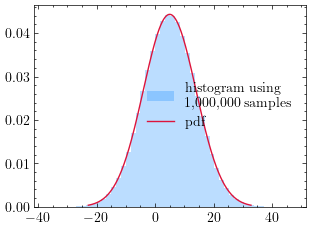

In [18]:
num_samples = 1000000
samples = stats.norm.rvs(loc=5, scale=3 ** 2, size=num_samples)
plt.hist(samples, bins=50, density=True, histtype='stepfilled', color='dodgerblue', alpha=0.3,
         label=f'histogram using\n {num_samples:,} samples')
x = np.linspace(stats.norm.ppf(0.001, loc=5, scale=3 ** 2), stats.norm.ppf(0.999, loc=5, scale=3 ** 2), 500)
plt.plot(x, stats.norm.pdf(x, loc=5, scale=3 ** 2), color='crimson', label='pdf')
plt.legend()
plt.show()

In [51]:
x=np.linspace(-1000,1000, 1000)

In [60]:
a = stats.norm.pdf(x, loc=5, scale=3**2)
b = stats.norm.pdf(x, loc=5, scale=9**2)

In [61]:
print(hellinger_explicit(a, b))

0.5152413199753333
